## For feb 2010

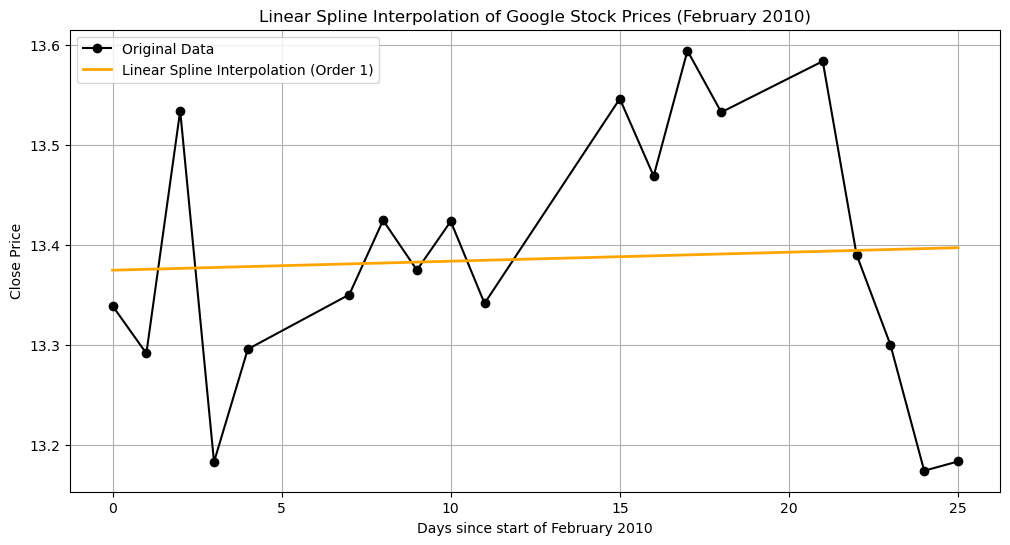

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2010
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2010[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Create linear spline interpolation function (order 1)
linear_spline = UnivariateSpline(x, y, k=1)

# Create new x values for interpolation
x_new = np.linspace(x.min(), x.max(), num=100)
y_new = linear_spline(x_new)

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(x, y, 'ko-', label='Original Data')  # Black solid line for original data
plt.plot(x_new, y_new, 'orange', label='Linear Spline Interpolation (Order 1)', linewidth=2)  # Orange line for interpolation
plt.xlabel('Days since start of February 2010')
plt.ylabel('Close Price')
plt.title('Linear Spline Interpolation of Google Stock Prices (February 2010)')
plt.legend()
plt.grid()

plt.show()

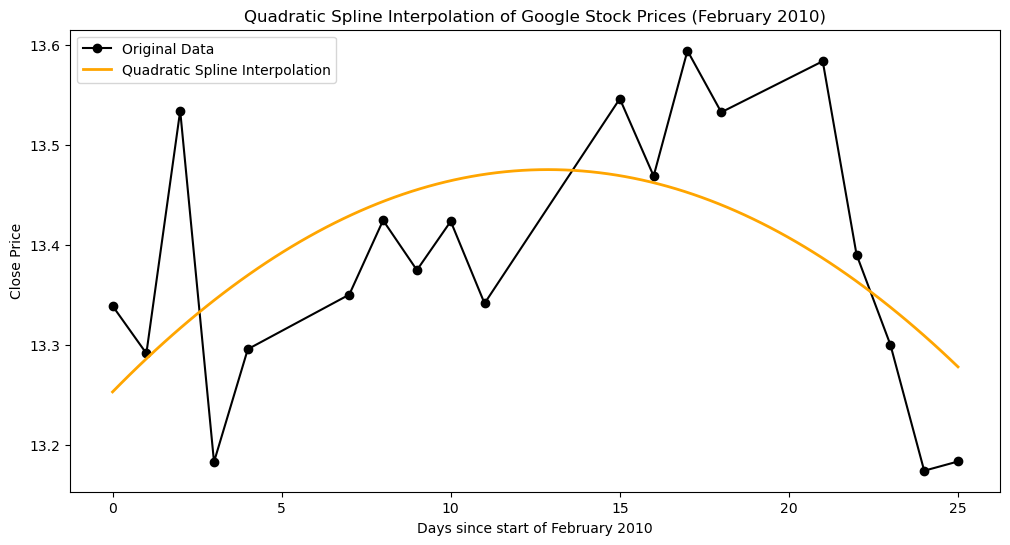

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2010
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2010[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Create quadratic spline interpolation function (order 2)
quadratic_spline = UnivariateSpline(x, y, k=2)

# Create new x values for interpolation
x_new = np.linspace(x.min(), x.max(), num=100)
y_new = quadratic_spline(x_new)

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(x, y, 'ko-', label='Original Data')  # Black solid line for original data
plt.plot(x_new, y_new, 'orange', label='Quadratic Spline Interpolation', linewidth=2)  # Orange line for interpolation
plt.xlabel('Days since start of February 2010')
plt.ylabel('Close Price')
plt.title('Quadratic Spline Interpolation of Google Stock Prices (February 2010)')
plt.legend()

plt.show()

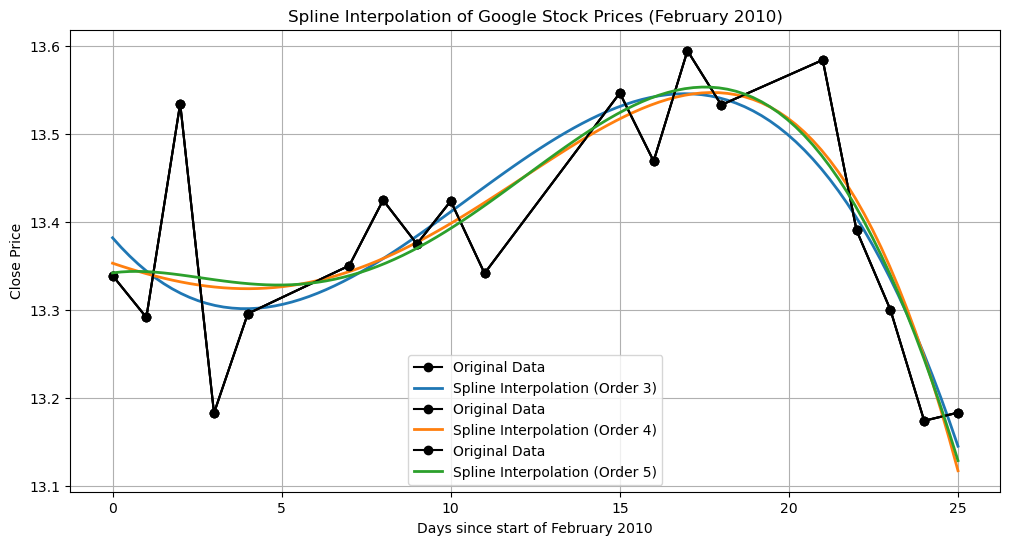

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2010
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2010[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Create a function to plot spline interpolation for a given order
def plot_spline(order):
    spline = UnivariateSpline(x, y, k=order)

    # Create new x values for interpolation
    x_new = np.linspace(x.min(), x.max(), num=100)
    y_new = spline(x_new)

    # Plotting
    plt.plot(x, y, 'ko-', label='Original Data')  # Black solid line for original data
    plt.plot(x_new, y_new, label=f'Spline Interpolation (Order {order})', linewidth=2)  # Line for interpolation

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot for different spline orders
for order in range(3, 6):
    plot_spline(order)

plt.xlabel('Days since start of February 2010')
plt.ylabel('Close Price')
plt.title('Spline Interpolation of Google Stock Prices (February 2010)')
plt.legend()
plt.grid()
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.metrics import mean_squared_error

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2010
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2010[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Function to compute and return MSE for different orders
def compute_mse(order):
    spline = UnivariateSpline(x, y, k=order)
    y_interp = spline(x)
    mse = mean_squared_error(y, y_interp)
    return mse

# Calculate MSE for different orders
mse_results = {}
for order in range(1, 6):  # Orders 1 to 5
    mse = compute_mse(order)
    mse_results[order] = mse

# Display MSE results
for order, mse in mse_results.items():
    print(f'MSE for Order {order} (February 2010): {mse:.4f}')


MSE for Order 1 (February 2010): 0.0167
MSE for Order 2 (February 2010): 0.0116
MSE for Order 3 (February 2010): 0.0059
MSE for Order 4 (February 2010): 0.0057
MSE for Order 5 (February 2010): 0.0056


## For Feb 2020

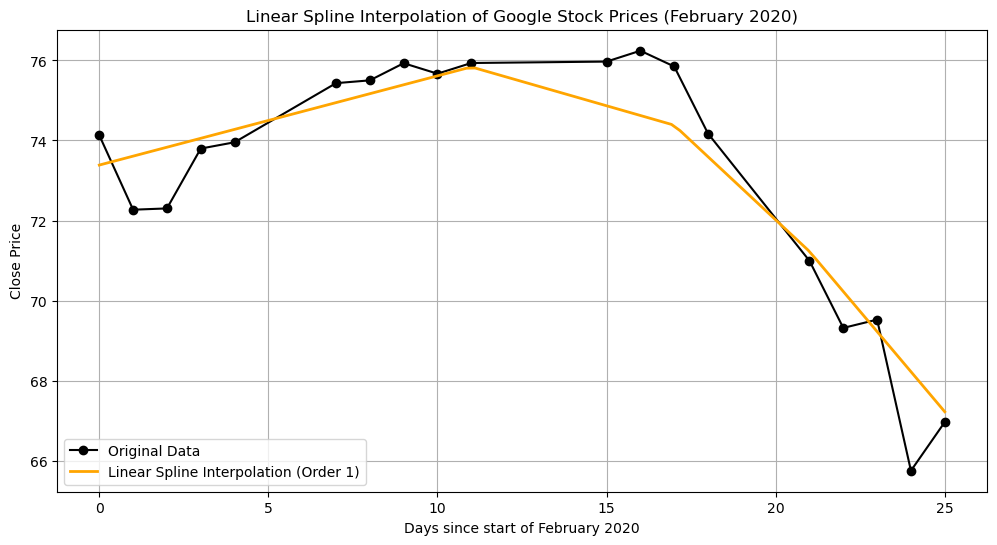

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2020
google_training_complete_feb_2020 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2020) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2020[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Create linear spline interpolation function (order 1)
linear_spline = UnivariateSpline(x, y, k=1)

# Create new x values for interpolation
x_new = np.linspace(x.min(), x.max(), num=100)
y_new = linear_spline(x_new)

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(x, y, 'ko-', label='Original Data')  # Black solid line for original data
plt.plot(x_new, y_new, 'orange', label='Linear Spline Interpolation (Order 1)', linewidth=2)  # Orange line for interpolation
plt.xlabel('Days since start of February 2020')
plt.ylabel('Close Price')
plt.title('Linear Spline Interpolation of Google Stock Prices (February 2020)')
plt.legend()
plt.grid()

plt.show()

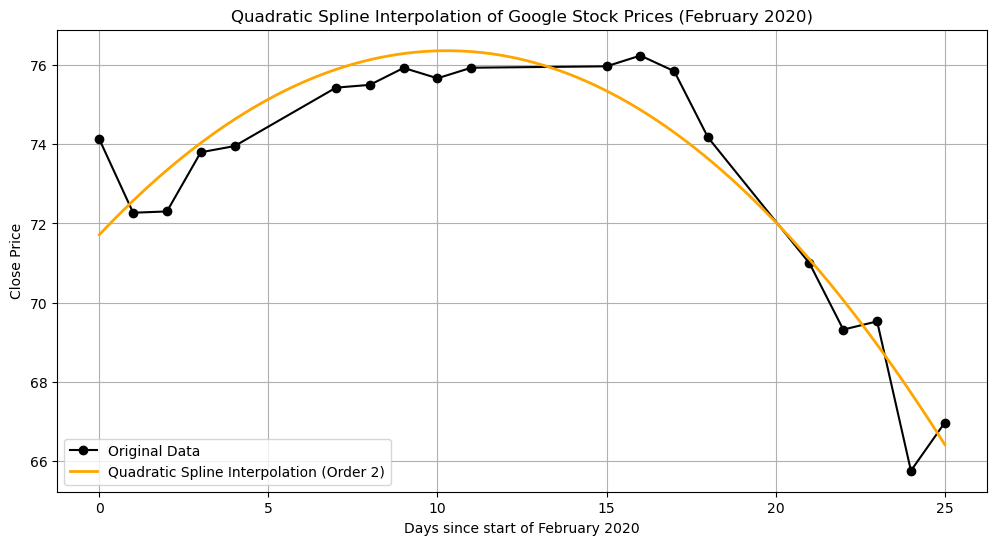

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2020
google_training_complete_feb_2020 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2020) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2020[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Create quadratic spline interpolation function (order 2)
quadratic_spline = UnivariateSpline(x, y, k=2)

# Create new x values for interpolation
x_new = np.linspace(x.min(), x.max(), num=100)
y_new = quadratic_spline(x_new)

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(x, y, 'ko-', label='Original Data')  # Black solid line for original data
plt.plot(x_new, y_new, 'orange', label='Quadratic Spline Interpolation (Order 2)', linewidth=2)  # Orange line for interpolation
plt.xlabel('Days since start of February 2020')
plt.ylabel('Close Price')
plt.title('Quadratic Spline Interpolation of Google Stock Prices (February 2020)')
plt.legend()
plt.grid()

plt.show()

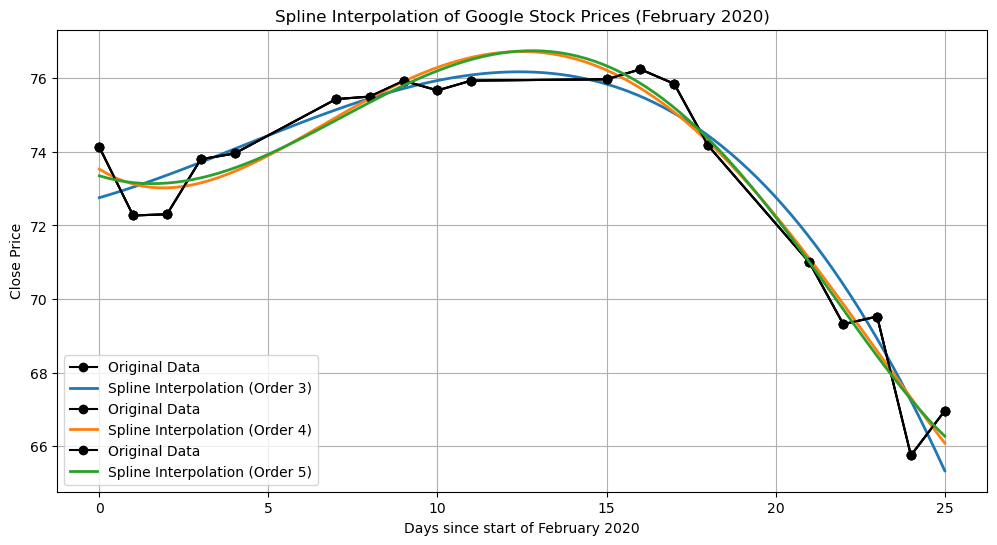

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2020
google_training_complete_feb_2020 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2020) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2020[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Create a function to plot spline interpolation for a given order
def plot_spline(order):
    spline = UnivariateSpline(x, y, k=order)

    # Create new x values for interpolation
    x_new = np.linspace(x.min(), x.max(), num=100)
    y_new = spline(x_new)

    # Plotting
    plt.plot(x, y, 'ko-', label='Original Data')  # Black solid line for original data
    plt.plot(x_new, y_new, label=f'Spline Interpolation (Order {order})', linewidth=2)  # Line for interpolation

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot for different spline orders
for order in range(3, 6):
    plot_spline(order)

plt.xlabel('Days since start of February 2020')
plt.ylabel('Close Price')
plt.title('Spline Interpolation of Google Stock Prices (February 2020)')
plt.legend()
plt.grid()
plt.show()

In [10]:
# Filter for February 2020
google_training_complete_feb_2020 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2020) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2020[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Calculate MSE for different orders for February 2020
mse_results_2020 = {}
for order in range(1, 6):  # Orders 1 to 5
    mse = compute_mse(order)
    mse_results_2020[order] = mse

# Display MSE results for February 2020
for order, mse in mse_results_2020.items():
    print(f'MSE for Order {order} (February 2020): {mse:.4f}')

MSE for Order 1 (February 2020): 1.0000
MSE for Order 2 (February 2020): 0.9993
MSE for Order 3 (February 2020): 0.6319
MSE for Order 4 (February 2020): 0.4544
MSE for Order 5 (February 2020): 0.4406
